In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from itertools import combinations_with_replacement 

In [2]:
df = pd.read_csv('./dataset/customer_churn.csv')
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1368,6250-CGGUN,Male,0,No,No,54,Yes,No,Fiber optic,Yes,...,Yes,Yes,No,No,One year,No,Electronic check,84.40,4484.05,No
185,1024-GUALD,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.8,Yes
3621,2933-FILNV,Female,0,Yes,Yes,2,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,24.40,36.55,Yes
5952,4430-YHXGG,Female,0,No,Yes,4,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,25.45,84.2,No
5843,1480-IVEVR,Male,1,Yes,No,35,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,One year,Yes,Bank transfer (automatic),81.60,2815.25,No
2207,4285-GYRQC,Female,0,Yes,No,7,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,86.25,587.1,Yes
2039,6298-QDFNH,Male,0,No,No,22,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,79.35,1730.35,Yes
2826,3638-DIMPH,Female,0,Yes,No,13,Yes,No,DSL,No,...,No,No,No,No,One year,No,Electronic check,43.80,592.65,No
2246,7181-BQYBV,Female,0,Yes,Yes,1,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,102.45,102.45,Yes
3666,3194-ORPIK,Female,0,Yes,Yes,50,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),84.40,4116.15,Yes


In [3]:
def print_detail(path):
    with open(path, 'r') as files:
        for file in files:
            print(file.strip())

In [4]:
pd.set_option('display.max_columns', len(df.columns))

In [5]:
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5158,8092-NLTGF,Male,0,No,No,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),24.75,1777.6,No
5294,2927-CVULT,Female,0,Yes,Yes,53,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),104.05,5566.4,No
1624,2929-QNSRW,Female,0,Yes,No,56,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,Yes,Electronic check,98.25,5508.35,Yes
3739,5789-LDFXO,Male,0,No,No,24,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,24.60,592.65,No
5031,8118-TJAFG,Male,0,Yes,Yes,9,Yes,No,Fiber optic,No,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,101.50,906.85,No
608,8207-DMRVL,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),114.55,8306.05,No
2802,3001-CBHLQ,Male,1,Yes,No,32,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.90,3351.55,Yes
1130,5859-HZYLF,Male,0,Yes,Yes,26,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.15,515.75,No
854,7695-PKLCZ,Female,0,No,No,68,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.50,1424.9,No
3504,3678-MNGZX,Male,0,Yes,Yes,68,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.95,1377.7,No


In [6]:
df.drop('customerID', axis='columns', inplace=True)

In [7]:
df.shape

(7043, 20)

In [8]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [9]:
numerik_df = df[df.describe().columns]
kategori_df = df.drop(columns=df.describe().columns)

display(kategori_df.sample(10))
display(numerik_df.sample(10))

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
165,Male,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,1363.45,No
1233,Female,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),1685.9,No
2992,Male,No,No,No,No phone service,DSL,No,Yes,No,Yes,No,No,Month-to-month,No,Mailed check,442.45,No
4016,Female,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,45.35,No
2456,Male,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,1160.45,No
1234,Male,No,Yes,Yes,No,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,One year,Yes,Electronic check,5826.65,No
1349,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,2553.35,No
5364,Male,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),1597.25,Yes
5928,Female,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),1311.6,No
5587,Female,No,No,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,One year,Yes,Bank transfer (automatic),4126.35,No


,SeniorCitizen,tenure,MonthlyCharges
4753,0,4,80.85
761,0,22,89.25
4197,0,22,84.75
3771,0,1,79.05
4769,0,35,19.90
4783,1,71,69.20
4247,0,69,106.35
902,0,17,93.85
5128,1,47,99.70
6035,1,66,110.85


In [10]:
def table_diagnose(df):
    new_df = df.copy(deep=True)
    _1 = pd.concat([new_df.isnull().sum(), new_df.nunique(), new_df.dtypes], axis=1, keys=['n null', 'n unique', 'types']).reset_index()

    _2 = new_df.nunique().reset_index()
    _3 = _2.loc[_2[0] < 5, 'index'].apply(lambda x: new_df[x].unique())

    result = pd.merge(_1, _3, left_index=True, right_index=True, how='outer')
    result.rename(columns={'index_x': 'columns', 'index_y':'unique vals'}, inplace=True)
    return result

table_diagnose(df)

,columns,n null,n unique,types,unique vals
0,gender,0,2,object,"[Female, Male]"
1,SeniorCitizen,0,2,int64,"[0, 1]"
2,Partner,0,2,object,"[Yes, No]"
3,Dependents,0,2,object,"[No, Yes]"
4,tenure,0,73,int64,NaN
5,PhoneService,0,2,object,"[No, Yes]"
6,MultipleLines,0,3,object,"[No phone service, No, Yes]"
7,InternetService,0,3,object,"[DSL, Fiber optic, No]"
8,OnlineSecurity,0,3,object,"[No, Yes, No internet service]"
9,OnlineBackup,0,3,object,"[Yes, No, No internet service]"


In [11]:
# df['TotalCharges'] = df['TotalCharges'].astype(float) # jika di run akan error karna ada karakter yang bukan angka, sehingga tidak bisa dilakukan casting

In [12]:
import re
# df['TotalCharges'].apply(lambda x: re.findall(r'^\d+\.?\d+$', x))

arr = []
for idx, val in enumerate(df['TotalCharges'].values):
    if re.search(r'^\D*$', val):
        arr.append((idx, val))

print(arr)

[(488, ' '), (753, ' '), (936, ' '), (1082, ' '), (1340, ' '), (3331, ' '), (3826, ' '), (4380, ' '), (5218, ' '), (6670, ' '), (6754, ' ')]


In [13]:
df.loc[pd.DataFrame(arr)[0], 'TotalCharges']

488      
753      
936      
1082     
1340     
3331     
3826     
4380     
5218     
6670     
6754     
Name: TotalCharges, dtype: object

In [14]:
dummy_df =df.copy(deep=True)

dummy_df['TotalCharges'].replace({' ': np.nan}, inplace=True)
dummy_df['TotalCharges'] = dummy_df['TotalCharges'].astype(float)

In [15]:
numerik_df = dummy_df[dummy_df.describe().columns]
kategori_df = dummy_df.drop(columns=dummy_df.describe().columns)

display(kategori_df.sample(10))
display(numerik_df.sample(10))

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
3487,Female,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),No
6807,Male,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),No
1679,Male,No,Yes,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,No
5089,Male,Yes,Yes,Yes,No,DSL,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,No
1378,Female,Yes,Yes,Yes,Yes,DSL,No,Yes,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),No
3797,Male,Yes,No,Yes,Yes,DSL,Yes,No,Yes,No,Yes,Yes,One year,Yes,Electronic check,No
4472,Male,Yes,Yes,Yes,No,Fiber optic,Yes,No,Yes,No,No,No,Two year,No,Credit card (automatic),No
4500,Male,Yes,Yes,Yes,No,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),No
2103,Male,Yes,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
153,Male,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Electronic check,No


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
2467,0,49,97.95,4917.90
1353,0,66,20.35,1359.50
1247,0,24,83.15,2033.05
2558,0,38,20.05,678.20
1177,0,46,79.20,3593.80
2439,0,17,19.90,329.75
5835,0,30,19.30,602.90
1689,0,7,58.85,465.70
5667,0,4,20.15,91.40
6157,0,3,19.85,64.55


In [16]:
table_diagnose(dummy_df)

,columns,n null,n unique,types,unique vals
0,gender,0,2,object,"[Female, Male]"
1,SeniorCitizen,0,2,int64,"[0, 1]"
2,Partner,0,2,object,"[Yes, No]"
3,Dependents,0,2,object,"[No, Yes]"
4,tenure,0,73,int64,NaN
5,PhoneService,0,2,object,"[No, Yes]"
6,MultipleLines,0,3,object,"[No phone service, No, Yes]"
7,InternetService,0,3,object,"[DSL, Fiber optic, No]"
8,OnlineSecurity,0,3,object,"[No, Yes, No internet service]"
9,OnlineBackup,0,3,object,"[Yes, No, No internet service]"


In [17]:
dummy_df.loc[pd.DataFrame(arr)[0], 'TotalCharges']

488    NaN
753    NaN
936    NaN
1082   NaN
1340   NaN
3331   NaN
3826   NaN
4380   NaN
5218   NaN
6670   NaN
6754   NaN
Name: TotalCharges, dtype: float64

In [18]:
dummy_df.sample(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5987,Female,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.35,20.35,No
4997,Male,1,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.70,93.70,Yes
5954,Male,0,No,No,20,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),55.00,1165.55,No
831,Male,0,Yes,Yes,38,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),25.05,963.95,No
6479,Female,0,No,No,1,Yes,No,DSL,No,No,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),55.00,55.00,Yes
296,Female,0,Yes,Yes,71,Yes,No,Fiber optic,No,No,Yes,No,No,No,Two year,No,Electronic check,76.05,5436.45,No
2461,Female,0,No,No,70,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.70,1341.50,No
2323,Female,0,No,No,29,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),98.60,2933.20,Yes
4181,Female,0,Yes,No,62,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,101.35,6164.70,No
3802,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.00,20.00,No


In [19]:
dummy_df.replace({'No phone service': 'No', 'No internet service': 'No'}, inplace=True)

In [20]:
table_diagnose(dummy_df)

,columns,n null,n unique,types,unique vals
0,gender,0,2,object,"[Female, Male]"
1,SeniorCitizen,0,2,int64,"[0, 1]"
2,Partner,0,2,object,"[Yes, No]"
3,Dependents,0,2,object,"[No, Yes]"
4,tenure,0,73,int64,NaN
5,PhoneService,0,2,object,"[No, Yes]"
6,MultipleLines,0,2,object,"[No, Yes]"
7,InternetService,0,3,object,"[DSL, Fiber optic, No]"
8,OnlineSecurity,0,2,object,"[No, Yes]"
9,OnlineBackup,0,2,object,"[Yes, No]"


In [21]:
print_detail('./dataset/data_detail.txt')

# *DATA DETAIL*

Data churn pelanggan Telco berisi informasi tentang perusahaan telco fiktif yang menyediakan layanan telepon rumah dan Internet kepada 7043 pelanggan di California pada Q3. Ini menunjukkan pelanggan mana yang telah pergi, tinggal, atau mendaftar untuk layanan mereka. Beberapa demografi penting disertakan untuk setiap pelanggan, serta Skor Kepuasan, Skor Churn, dan indeks Nilai Seumur Hidup Pelanggan (CLTV).

* gender: gender dari customer Pria atau Wanita.
* SeniorCitizen: mengindikasikan bahwa customer 65 tahun atau lebih, jika 1 iya jika 0 tidak.
* Dependents: mengindikasikan bahwa customer hidup dengan beberapa dependent seperti anak, orang tua, kakek atau nenek, dan seterusnya.
* tenure: menunjukkan jumlah total bulan customer telah berlangganan pada akhir kuartal Q3.
>    |Pengertian Tahun, Kuartal, dan Triwulan
>    | | 1 Tahun = 12 Bulan (Januari - Desember)
>    |   | Kuartal = 4 Bagian
>    |   | Kuartal 1 (Q1) = Januari - Maret
>    |   | Kuartal 2 (Q2) = Apr

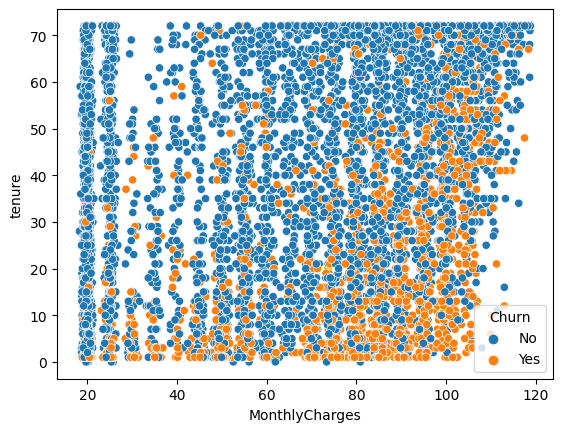

In [22]:
sns.scatterplot(data=dummy_df, x='MonthlyCharges', y='tenure', hue='Churn')
plt.show()

SeniorCitizen
0    5901
1    1142
dtype: int64

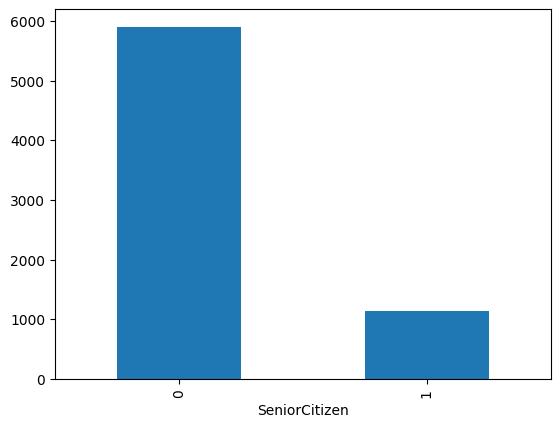

In [23]:
by_seniorcetizen = dummy_df.groupby(by='SeniorCitizen')

display(by_seniorcetizen.size())
by_seniorcetizen.size().plot(kind='bar')
plt.show()

In [24]:
by_status = dummy_df.pivot_table(values=['tenure', 'MonthlyCharges', 'TotalCharges'], columns=['SeniorCitizen', 'Dependents'], index='gender', aggfunc='mean')
by_status

MonthlyCharges                                  TotalCharges  \
SeniorCitizen              0                     1                       0   
Dependents                No        Yes         No        Yes           No   
gender                                                                       
Female             63.967761  58.466937  81.062357  81.703571  2046.185522   
Male               63.216068  58.523524  78.147619  82.795918  2040.864836   

                                                         tenure             \
SeniorCitizen                         1                       0              
Dependents             Yes           No          Yes         No        Yes   
gender                                                                       
Female         2428.082416  2776.137833  3638.905952  29.234747  37.931034   
Male           2465.181207  2664.369048  4034.182653  29.028747  38.216844   

                                     
SeniorCitizen          1             
Dependents            No        Yes  
gender                               
Female         31.823194  42.619048  
Male           32.773333  46.714286

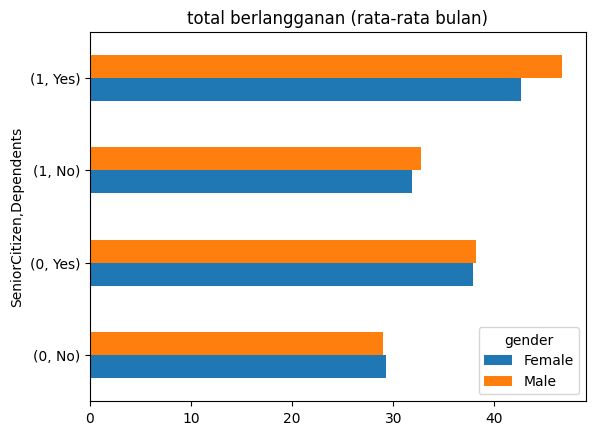

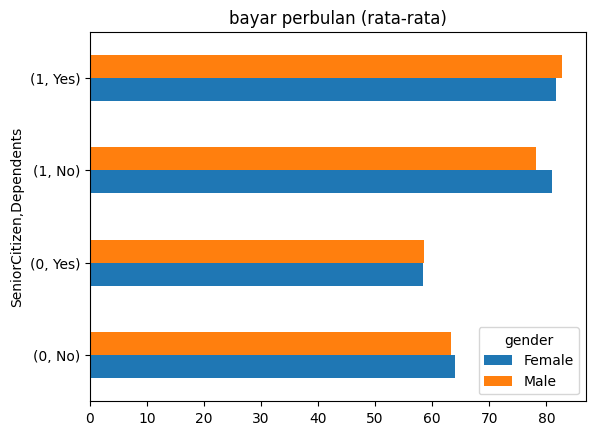

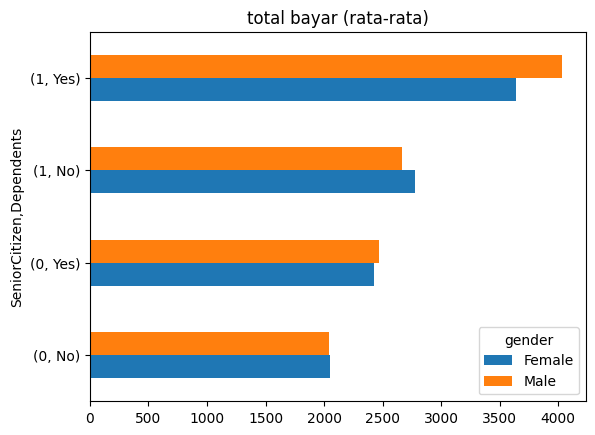

In [25]:
by_status['tenure'].T.plot(kind='barh', title='total berlangganan (rata-rata bulan)')
by_status['MonthlyCharges'].T.plot(kind='barh', title='bayar perbulan (rata-rata)')
by_status['TotalCharges'].T.plot(kind='barh', title='total bayar (rata-rata)')
plt.show()

TotalCharges      
                        mean count
InternetService                   
DSL              2119.789259  2416
Fiber optic      3205.304570  3096
No                665.220329  1520

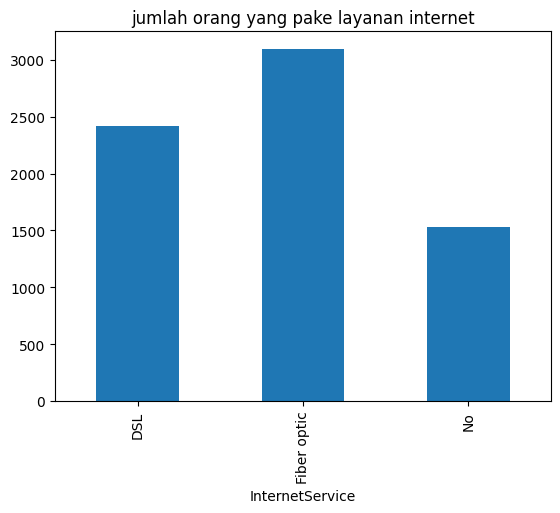

In [26]:
by_InternetService = dummy_df.groupby(by='InternetService')

display(by_InternetService[['TotalCharges']].agg(['mean', 'count']))
by_InternetService.size().plot(kind='bar', title='jumlah orang yang pake layanan internet')
plt.show()

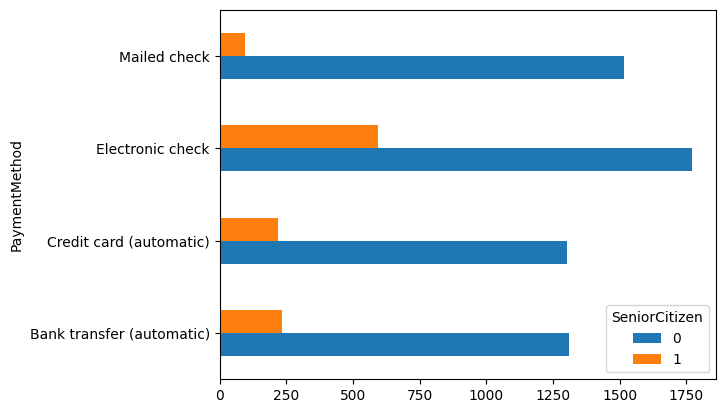

In [27]:
by_seniorcetizen['PaymentMethod'].value_counts().unstack('SeniorCitizen').plot(kind='barh')
plt.show()

In [28]:
get_cols = table_diagnose(dummy_df)
target_cols = get_cols[get_cols['n unique'] == 2].iloc[4:-2, 0]

filter_by_subs = dummy_df[np.append(target_cols, 'MonthlyCharges')].melt(id_vars='MonthlyCharges')
by_subs = filter_by_subs.groupby(by='value')['variable'].value_counts().unstack('variable')
by_subs

variable,DeviceProtection,MultipleLines,OnlineBackup,OnlineSecurity,PhoneService,StreamingMovies,StreamingTV,TechSupport
value,,,,,,,,
No,4621,4072,4614,5024,682,4311,4336,4999
Yes,2422,2971,2429,2019,6361,2732,2707,2044


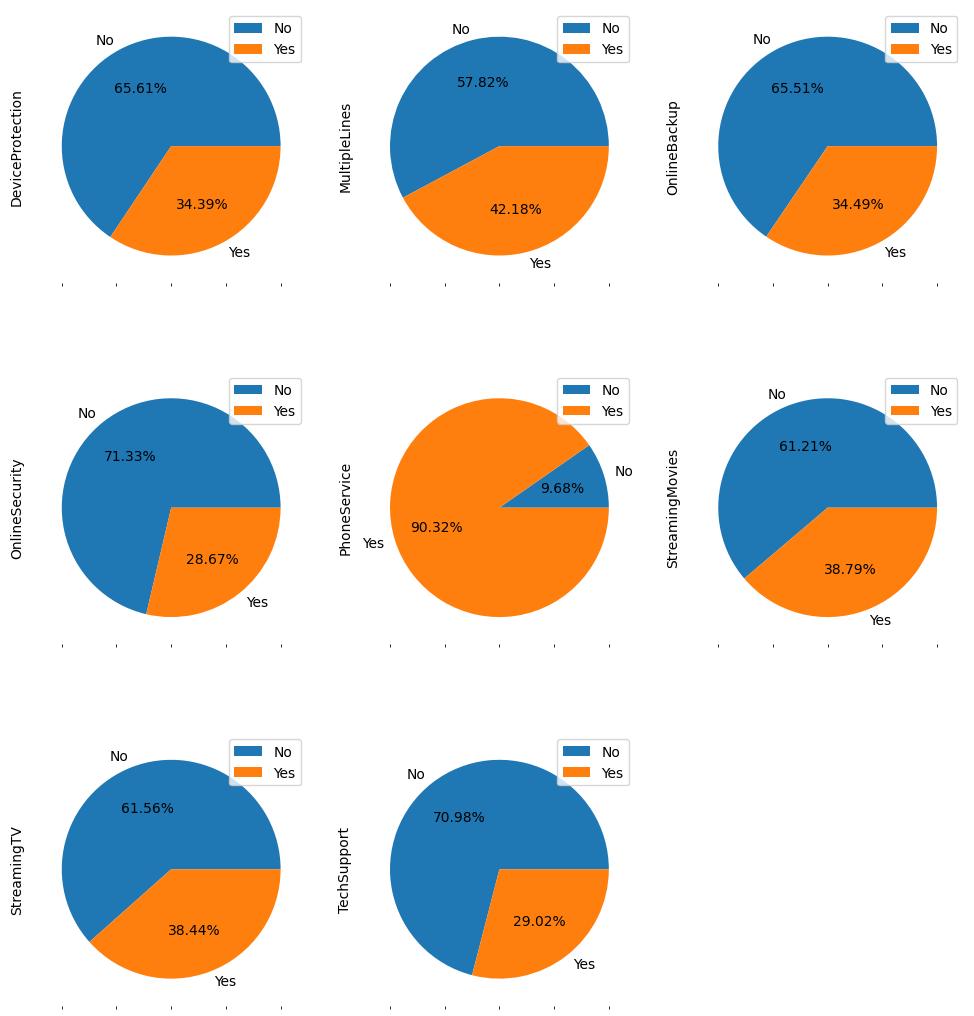

In [29]:
by_subs.plot(kind='pie', subplots=True, figsize=(12, 18), layout=(4,3), autopct='%1.2f%%')
plt.show()

Dari pie plot diatas bahwa service yang sering digunakan adalah *PhoneService* sedangkan yang jarang digunakan adalah *OnlineSecurity*

In [30]:
base_df = filter_by_subs.groupby(by='value')['MonthlyCharges'].agg(['mean', 'count']) 
base_df['count'] = (base_df['count'] / len(target_cols)).apply(lambda x: round(x))
base_df

,mean,count
value,,
No,54.027727,4082
Yes,79.562645,2961


Dari tabel diatas dapat disimpulkan bahwa sebanyak 4082 orang rata-rata cenderung tidak menggunakan layanan yang disediakan tetapi alhasil bayaran rata-rata lebih murah dibandingkan dengan yang cenderung banyak menggunakan layanan yang disediakan.

In [31]:
dummy_df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5343,Female,0,Yes,No,52,No,No,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),66.25,3330.10,No
1497,Female,0,Yes,Yes,51,Yes,No,Fiber optic,Yes,Yes,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.15,4018.55,No
4530,Female,0,Yes,No,67,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,19.65,1335.20,No
6892,Female,0,Yes,Yes,48,Yes,No,Fiber optic,Yes,No,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),99.70,4977.20,No
787,Female,0,Yes,No,34,Yes,Yes,DSL,Yes,No,No,Yes,No,No,Month-to-month,Yes,Bank transfer (automatic),60.85,2003.60,No


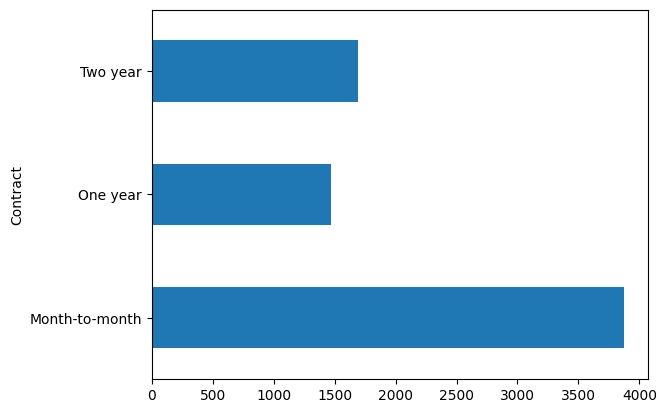

In [32]:
dummy_df.groupby(by='Contract').size().plot(kind='barh')
plt.show()

In [33]:
table_diagnose(dummy_df)

,columns,n null,n unique,types,unique vals
0,gender,0,2,object,"[Female, Male]"
1,SeniorCitizen,0,2,int64,"[0, 1]"
2,Partner,0,2,object,"[Yes, No]"
3,Dependents,0,2,object,"[No, Yes]"
4,tenure,0,73,int64,NaN
5,PhoneService,0,2,object,"[No, Yes]"
6,MultipleLines,0,2,object,"[No, Yes]"
7,InternetService,0,3,object,"[DSL, Fiber optic, No]"
8,OnlineSecurity,0,2,object,"[No, Yes]"
9,OnlineBackup,0,2,object,"[Yes, No]"


In [34]:
class Clean_Data:
  def __init__(self, data, target_columns):
    self.target_columns = target_columns
    self.data = data

  def detect_outlier(self):
    q1, q3, iqr, lower_limit, upper_limit = {}, {}, {}, {}, {}
    select_data = self.data[self.target_columns].quantile([.25, .75])

    for key, val in select_data.to_dict().items():  
      q1[key] = val[0.25]
      q3[key] = val[0.75]
      iqr[key] = q3[key] - q1[key]
      lower_limit[key], upper_limit[key] = q1[key] - 1.5*iqr[key], q3[key] + 1.5*iqr[key]

    self.lower_limit = lower_limit
    self.upper_limit = upper_limit
    self.q1 = q1
    self.q3 = q3
    self.iqr = iqr

  def remove_outlier(self):
    new_df = self.data.copy(deep=True)
    for col in self.target_columns:
      new_df = new_df[new_df[col].between(self.lower_limit[col], self.upper_limit[col])]

    return new_df

  @property
  def get_report(self):
    lower = np.array(list(self.lower_limit.values())).reshape(-1,1)
    upper = np.array(list(self.upper_limit.values())).reshape(-1,1)
    iqr = np.array(list(self.iqr.values())).reshape(-1,1)
    q1 = np.array(list(self.q1.values())).reshape(-1,1)
    q3 = np.array(list(self.q3.values())).reshape(-1,1)

    report_df = pd.DataFrame(
      np.c_[np.round(lower, 2), np.round(upper, 2), iqr, q1, q3], 
      columns=['lower limit', 'upper limit', 'iqr', 'q1', 'q3'], 
      index=self.lower_limit.keys()
    )
    report_df[['lower limit', 'upper limit']] = report_df[['lower limit', 'upper limit']].astype(float)
    
    self.report_df = report_df
    return report_df

  def plot_report(self, x, y):
    x_ = x
    y_ = y

    P_1 = self.report_df.loc[x_, 'lower limit']
    P_2 = self.report_df.loc[y_, 'lower limit']

    Q_1 = self.report_df.loc[x_, 'upper limit']
    Q_2 = self.report_df.loc[y_, 'upper limit']

    sns.scatterplot(data=self.data, x=x_, y=y_)
    plt.vlines(Q_1, P_2, Q_2, colors='k')
    plt.hlines(Q_2, P_1, Q_1, colors='k')
    
    plt.vlines(P_1, P_2, Q_2, colors='k')
    plt.hlines(P_2, P_1, Q_1, colors='k')

    plt.tight_layout()

In [35]:
dummy_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [36]:
numerik_df.quantile([.90, .98, .99])

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0.90,1.0,69.0,102.600,5976.640
0.98,1.0,72.0,111.558,7721.096
0.99,1.0,72.0,114.729,8039.883


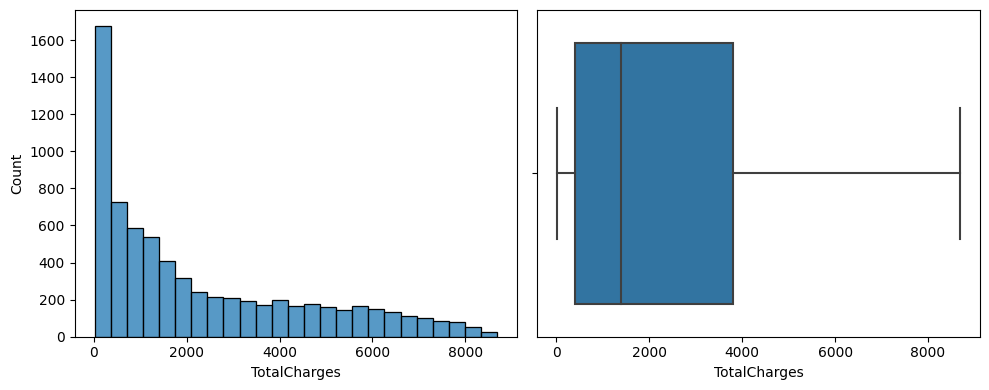

In [37]:
plt.figure(figsize=(10, 4))

plt.subplot(1,2,1)
sns.histplot(data=dummy_df, x='TotalCharges')
plt.subplot(1,2,2)
sns.boxplot(data=dummy_df, x='TotalCharges')

plt.tight_layout()
plt.show()

In [38]:
clean_df = Clean_Data(dummy_df, ['TotalCharges'])
clean_df.detect_outlier()

clean_df.get_report

,lower limit,upper limit,iqr,q1,q3
TotalCharges,-4688.48,8884.67,3393.2875,401.45,3794.7375


In [39]:
dummy_df['TotalCharges'] = dummy_df['TotalCharges'].fillna(dummy_df['TotalCharges'].median())

table_diagnose(dummy_df)

,columns,n null,n unique,types,unique vals
0,gender,0,2,object,"[Female, Male]"
1,SeniorCitizen,0,2,int64,"[0, 1]"
2,Partner,0,2,object,"[Yes, No]"
3,Dependents,0,2,object,"[No, Yes]"
4,tenure,0,73,int64,NaN
5,PhoneService,0,2,object,"[No, Yes]"
6,MultipleLines,0,2,object,"[No, Yes]"
7,InternetService,0,3,object,"[DSL, Fiber optic, No]"
8,OnlineSecurity,0,2,object,"[No, Yes]"
9,OnlineBackup,0,2,object,"[Yes, No]"


In [40]:
target_cols_bin = get_cols[(get_cols['n unique'] == 2) & (get_cols['types'] == object)]['columns']
target_cols_ohe = get_cols[get_cols['n unique'].between(3, 10)]['columns']
target_cols_scaler = get_cols[get_cols['types'] != 'object']['columns']

print(target_cols_bin)
print()
print(target_cols_ohe)
print()
print(target_cols_scaler)

0               gender
2              Partner
3           Dependents
5         PhoneService
6        MultipleLines
8       OnlineSecurity
9         OnlineBackup
10    DeviceProtection
11         TechSupport
12         StreamingTV
13     StreamingMovies
15    PaperlessBilling
19               Churn
Name: columns, dtype: object

7     InternetService
14           Contract
16      PaymentMethod
Name: columns, dtype: object

1      SeniorCitizen
4             tenure
17    MonthlyCharges
18      TotalCharges
Name: columns, dtype: object


In [41]:
dummy_df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5398,Male,0,No,No,2,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Mailed check,19.75,39.30,No
3899,Female,1,Yes,No,52,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,109.10,5647.95,No
3586,Male,0,No,No,5,No,No,DSL,Yes,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,40.00,223.45,Yes
6623,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.45,76.45,Yes
779,Male,0,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,45.35,89.50,Yes


In [42]:
dummy_df_1 = dummy_df.copy(deep='True')

lb = LabelEncoder()
scaler = MinMaxScaler()

dummy_df_1[target_cols_bin] = dummy_df_1[target_cols_bin].apply(lb.fit_transform)
dummy_df_1[target_cols_scaler] = scaler.fit_transform(dummy_df_1[target_cols_scaler])
dummy_df_1 = pd.get_dummies(data=dummy_df_1, columns=target_cols_ohe)

dummy_df_1.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6419,1,1.0,1,0,0.958333,1,1,1,1,0,...,0,1,0,1,0,0,0,1,0,0
3369,0,1.0,0,0,0.152778,1,1,1,0,0,...,1,0,0,1,0,0,0,0,1,0
4177,1,0.0,0,1,0.291667,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2603,0,0.0,0,0,1.000000,1,1,1,1,1,...,0,1,0,0,0,1,0,0,1,0
6706,0,0.0,0,0,0.013889,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [67]:
X = dummy_df_1.drop(columns=['Churn'], axis='columns')
y = dummy_df_1['Churn']

In [68]:
print(X.shape, y.shape)

(7043, 26) (7043,)


In [69]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif

f, p = f_classif(X, y)
mi = mutual_info_classif(X, y)

features_df = pd.DataFrame({
    'Features': X.columns,
    'F scores': f,
    'MI scores': mi
}).set_index('Features').sort_values(['MI scores', 'F scores'], ascending=False)

features_df.style.bar(subset=['F scores', 'MI scores'], color='grey')

,F scores,MI scores
Features,,
Contract_Month-to-month,1382.340697,0.095226
tenure,997.268010,0.078872
Contract_Two year,707.919254,0.060571
InternetService_Fiber optic,738.046042,0.049088
MonthlyCharges,273.463704,0.046301
PaymentMethod_Electronic check,706.195028,0.043948
TotalCharges,290.439831,0.042070
InternetService_No,385.698588,0.029769
PaperlessBilling,268.985218,0.019843


In [70]:
X_fix = dummy_df_1.drop(columns=['Churn', 'gender', 'SeniorCitizen', 'StreamingMovies', 'PhoneService', 'DeviceProtection', 'OnlineBackup', 'StreamingTV', 'MultipleLines'], axis='columns')
y_fix = dummy_df_1['Churn']

In [71]:
(X_fix.shape, y_fix.shape)

((7043, 18), (7043,))

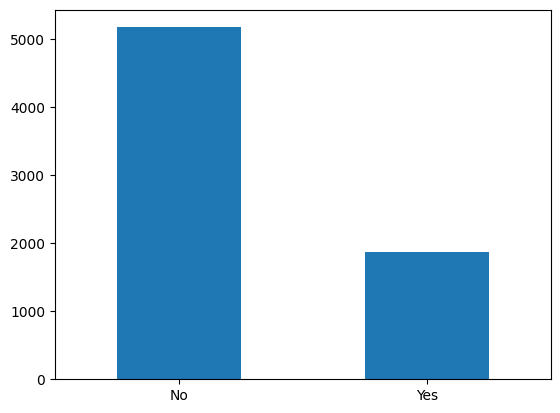

In [105]:
y_fix.value_counts().plot(kind='bar')
plt.xticks([0, 1], lb.classes_, rotation=0)
plt.show()

In [106]:
from imblearn.over_sampling import RandomOverSampler

smote = RandomOverSampler(sampling_strategy='minority')

X_sm, y_sm = smote.fit_resample(X_fix, y_fix)

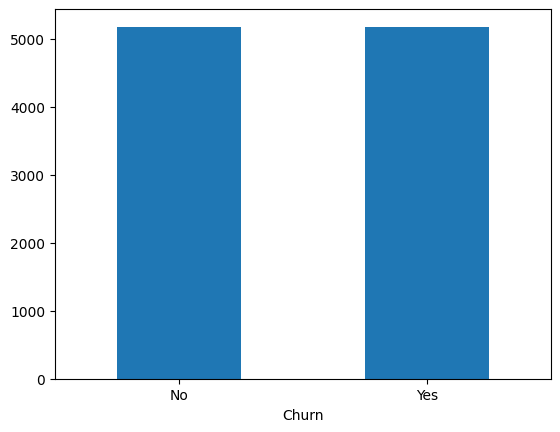

In [107]:
s = pd.Series(y_sm)
s.groupby(s).size().plot(kind='bar')
plt.xticks([0, 1], lb.classes_, rotation=0)
plt.show()


In [108]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_sm,
    y_sm,
    test_size=.20,
    stratify=y_sm,
    random_state=42
)

print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')

X_train: (8278, 18)
y_train: (8278,)
X_test: (2070, 18)
y_test: (2070,)


In [109]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

In [110]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.naive_bayes import GaussianNB

In [111]:
model_params=[
    {
        'model_name': 'DecisionTreeClassifier',
        'model': DecisionTreeClassifier()
    },
    {
        'model_name': 'RandomForestClassifier',
        'model': RandomForestClassifier()
    },
    {
        'model_name': 'LogisticRegression',
        'model': LogisticRegression()
    },
    {
        'model_name': 'SVM',
        'model': SVC()
    },
    {
        'model_name': 'KNeighborsClassifier',
        'model': KNeighborsClassifier()
    },
]

def tuning_models(X, y, model_params, model_name='model_name', model='model', max_splits=5, get_mean=False):
    rs = ShuffleSplit(n_splits=max_splits, test_size=.25, random_state=42)
    estimated_model = {}
    for idx in range(len(model_params)):
        cv_results = cross_validate(
            model_params[idx]['model'], X, y, cv=rs, scoring='accuracy'
        )
        estimated_model[model_params[idx]['model_name']]= cv_results['test_score']
    df_scoring = pd.DataFrame(estimated_model, index=[f'score {i}' for i in range(max_splits)])
    
    if get_mean:
        for col in df_scoring.columns:
            print(f'{col}: {df_scoring[col].mean()}')
    else:
        return df_scoring

In [112]:
display(tuning_models(X_train, y_train, model_params, 'model_name', 'model', 20))

,DecisionTreeClassifier,RandomForestClassifier,LogisticRegression,SVM,KNeighborsClassifier
score 0,0.838647,0.866667,0.766667,0.765217,0.754106
score 1,0.837198,0.863285,0.756039,0.754589,0.754589
score 2,0.828502,0.853623,0.744928,0.736715,0.747826
score 3,0.831401,0.855072,0.752174,0.747343,0.749758
score 4,0.829469,0.860386,0.761836,0.754106,0.767633
score 5,0.838164,0.868599,0.765217,0.763768,0.760870
score 6,0.838647,0.859420,0.744444,0.740580,0.742995
score 7,0.822222,0.879710,0.771498,0.766667,0.757005
score 8,0.828502,0.862319,0.768116,0.758937,0.759420
score 9,0.829952,0.859420,0.752174,0.746377,0.733333


In [113]:
print(tuning_models(X_train, y_train, model_params, 'model_name', 'model', 20, get_mean=True))

DecisionTreeClassifier: 0.8339855072463767
RandomForestClassifier: 0.8668840579710144
LogisticRegression: 0.7625845410628018
SVM: 0.7573671497584541
KNeighborsClassifier: 0.7558937198067632
None


In [118]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------


In [172]:
scores = []

clf = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid={   
        "n_estimators": [90, 100, 115, 130],
        "criterion": ['gini', 'entropy'],
        "max_depth": [None, 1, 5, 10, 25],
    },
    cv=5,
    n_jobs=4,
    return_train_score=False
)
clf.fit(X_train, y_train)
scores.append({
    'model': 'RandomForestClassifier',
    'best_score': clf.best_score_,
    'best_params': clf.best_params_
})

In [173]:
cv_df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
cv_df.loc[0, 'best_params']

{'criterion': 'gini', 'max_depth': None, 'n_estimators': 90}

In [174]:
model = RandomForestClassifier(criterion= 'gini', max_depth= None, n_estimators= 90)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [175]:
from sklearn.metrics import classification_report
y_pred = np.round(model.predict(X_test))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.81      0.88      1035
           1       0.84      0.96      0.90      1035

    accuracy                           0.89      2070
   macro avg       0.90      0.89      0.89      2070
weighted avg       0.90      0.89      0.89      2070



In [184]:
series_pred = pd.Series(y_pred)
series_pred[:10]

0    0
1    1
2    1
3    0
4    1
5    1
6    0
7    0
8    1
9    1
dtype: int64

In [185]:
series_test = pd.Series(y_test)
series_test[:10]

4152     0
10283    1
8318     1
5721     0
2860     0
8984     1
4629     0
3720     0
7845     1
4645     1
Name: Churn, dtype: int64

In [179]:
def plot_confusion_matrix(
    matrix,
    class_labels=False,
    figsize=(16, 8), 
    y_ticks_rot=0, 
    x_ticks_rot=0, 
    fs_title=20, 
    fs_label=14, 
    pallete=plt.cm.magma
):
    norm = matrix.sum(axis=1, keepdims=True)

    percentages = ((matrix / norm) * 100).ravel()
    matrices = matrix.ravel()

    cm = np.array([f'{val}\n{percentage:.2f}%' for percentage, val in zip(percentages, matrices)]).reshape(matrix.shape)

    plt.figure(figsize=figsize)

    if class_labels:
        values_labels = [val for val in class_labels.values()]
    else:
        values_labels = "auto"

    sns.heatmap(
        matrix, 
        annot=cm, 
        cmap=pallete, 
        fmt='s', 
        xticklabels=values_labels, 
        yticklabels=values_labels
    )
    plt.xticks(rotation=x_ticks_rot)
    plt.yticks(rotation=y_ticks_rot)
    plt.ylabel('True Label', fontsize=fs_label)
    plt.xlabel('Predicted Label', fontsize=fs_label)
    plt.title('confusion matrix', fontsize=fs_title)
    plt.show()

In [180]:
from sklearn.metrics import confusion_matrix

y_pred = np.round(model.predict(X_test).ravel())
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[842, 193],
       [ 40, 995]])

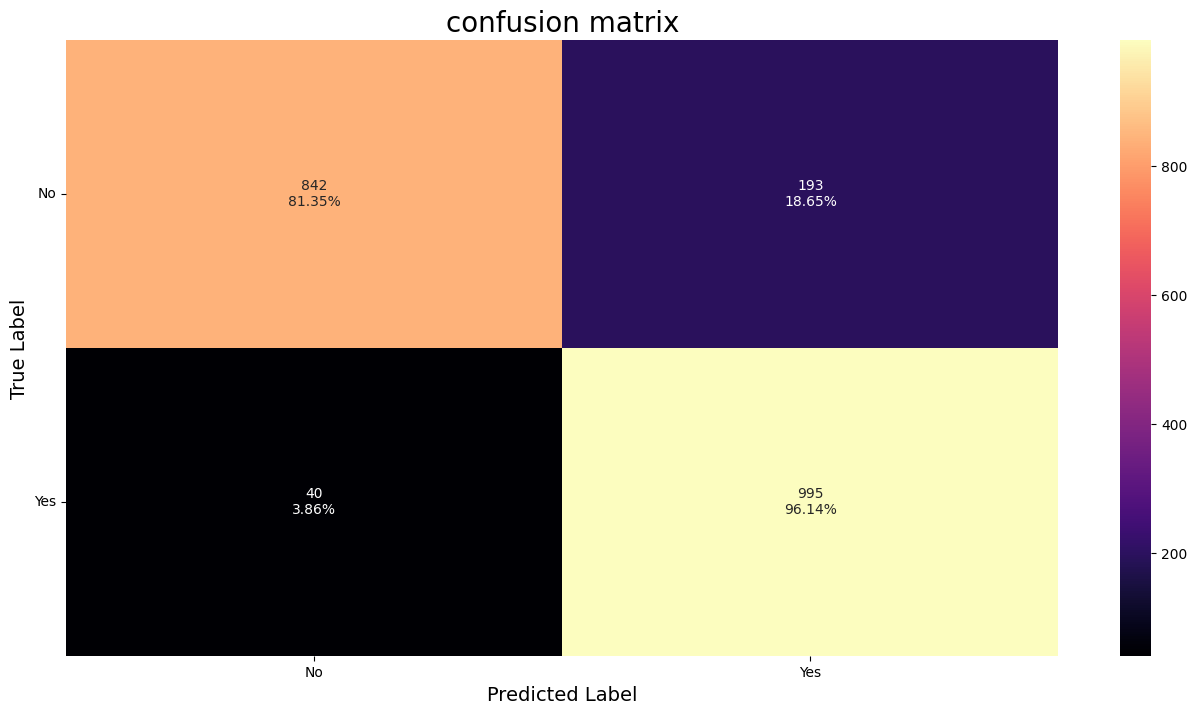

In [181]:
labels = {i:val for i, val in enumerate(lb.classes_)}
plot_confusion_matrix(matrix, pallete=plt.cm.magma, class_labels=labels)